##Exercise 1

1. Open the file './data/befkbhalderstatkode.csv'

2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

3. Using this data:

neighb = 
        {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

Find out how many people lived in each of the 11 areas in 2015

In [10]:
import numpy as np
# read data from csv file into 2d numpy array
#1 to 3:
filename = '../data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

dataMask = (bef_stats_df[:,0] == 2015)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = bef_stats_df[mask & (bef_stats_df[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

### working but makes it more complicated to solve 1.4:
#dataInfo = np.array([number_of_people_per_neighbourhood(n, dataMask) for n in neighb.keys()])
#for people in dataInfo:
    #print(neighb.get(count), "has:", people, "people")
    #count += 1
    
# Solution to above, without np.array though, but works better for 1.4 I think, as I want to connect key value pairs.
people_in_area = {}
for key in neighb:
    people_in_area[neighb[key]] = number_of_people_per_neighbourhood(key, dataMask)
print("try", people_in_area)

print("test", people_in_area.items())
# now lets sort by smallest to largest, and use it in 1.4 task
sorted_cities_and_people = {k: v for k, v in sorted(people_in_area.items(), key=lambda people: people[1])}
print("ok", sorted_cities_and_people.keys())
# 1.4: Make a bar plot to show the size of each city area from the smallest to the largest
%matplotlib notebook
import matplotlib.pyplot as plt
#plt.bar(sorted_cities_and_people.keys(), sorted_cities_and_people.values(), width=0.5, align='center')
#plt.xticks(rotation=35, horizontalalignment='right',fontweight='light')
#plt.subplots_adjust(bottom=0.23) # now the city text is actually read-able, it adjusts the margin bottom.

#1.5: Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
people_above_age_copenhagen = bef_stats_df[(dataMask) & (bef_stats_df[:,2] > 65)]
total_people = people_above_age_copenhagen[:,4].sum()
print("Total amount of people above 65 years who lived in Copenhagen in 2015:", total_people)

#1.6: How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
# STATKODE: [3], PERSONER: [4]
nordic_countries = [5110, 5120, 5104, 5105, 5106]
sum_of_nordic_countries = people_above_age_copenhagen[(np.isin(people_above_age_copenhagen[:,3], 
                                                                  nordic_countries))][:,4].sum()

print("People above 65 years who lived in Copenhagen and were from other nordic countries (not dk):", sum_of_nordic_countries)

# 1.7: Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
#plt.figure()


try {'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}
test dict_items([('Indre By', 51937), ('Østerbro', 75113), ('Nørrebro', 78802), ('Vesterbro/Kgs. Enghave', 61623), ('Valby', 51727), ('Vanløse', 39537), ('Brønshøj-Husum', 43908), ('Bispebjerg', 53604), ('Amager Øst', 55205), ('Amager Vest', 64967), ('Udenfor', 3872)])
ok dict_keys(['Udenfor', 'Vanløse', 'Brønshøj-Husum', 'Valby', 'Indre By', 'Bispebjerg', 'Amager Øst', 'Vesterbro/Kgs. Enghave', 'Amager Vest', 'Østerbro', 'Nørrebro'])
Total amount of people above 65 years who lived in Copenhagen in 2015: 55750
People above 65 years who lived in Copenhagen and were from other nordic countries (not dk): 610


<IPython.core.display.Javascript object>


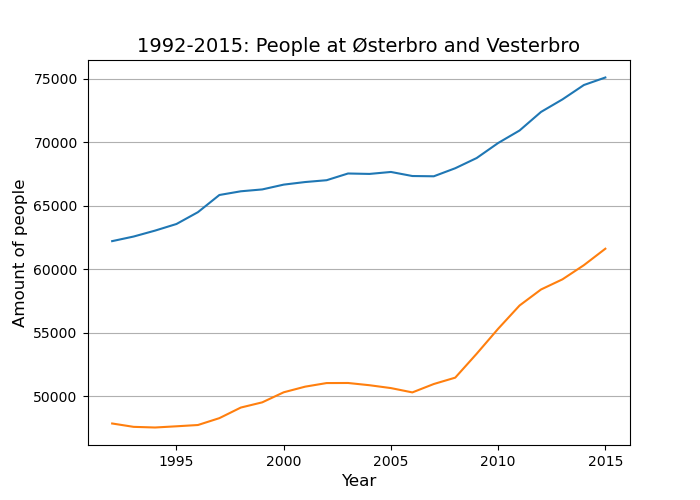

In [83]:
# 1.7: Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
import matplotlib.pyplot as plt
yearsRange = range(1992, 2016)
# østerbro: 2, vesterbro: 4
osterbro = 2;
vesterbro = 4;

osterbro = np.array([np.sum(bef_stats_df[((bef_stats_df[:,0] == year) & (bef_stats_df[:,1] == osterbro))][:, 4]) 
                     for year in yearsRange])
vesterbro = np.array([np.sum(bef_stats_df[((bef_stats_df[:,0] == year) & (bef_stats_df[:,1] == vesterbro))][:, 4]) 
                     for year in yearsRange])

plt.figure(figsize=[7,5])
plt.plot(list(yearsRange), list(osterbro), label="Østerbro")
plt.plot(list(yearsRange), list(vesterbro), label="Vesterbro")

title = '1992-2015: People at Østerbro and Vesterbro'
plt.title(title, fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount of people", fontsize=12)
plt.grid(axis="y")

4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015